<a href="https://colab.research.google.com/github/Manishkancharla/Machine_Learning/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Bike Details Dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv("/content/BIKE DETAILS.csv")

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
# 1. Range of selling prices
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"Range of selling prices: {price_range}")

Range of selling prices: 755000


In [ ]:
# 2. Median selling price
median_price = df['selling_price'].median()
print(f"Median selling price: {median_price}")

Median selling price: 45000.0


In [ ]:
# 3. Most common seller type
most_common_seller = df['seller_type'].value_counts().idxmax()
print(f"Most common seller type: {most_common_seller}")

Most common seller type: Individual


In [ ]:
# 4. Bikes with more than 50,000 km driven
bikes_high_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes with more than 50,000 km driven: {bikes_high_km}")

Number of bikes with more than 50,000 km driven: 170


In [ ]:
# 5. Average km_driven for each ownership type
avg_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print(f"Average km_driven for each owner type:\n{avg_km_driven_by_ownership}")

Average km_driven for each owner type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# 6. Proportion of bikes from 2015 or older
proportion_2015_older = (df['year'] <= 2015).mean()
print(f"Proportion of bikes from 2015 or older: {proportion_2015_older}")

Proportion of bikes from 2015 or older: 0.5664467483506126


Missing value percentages:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


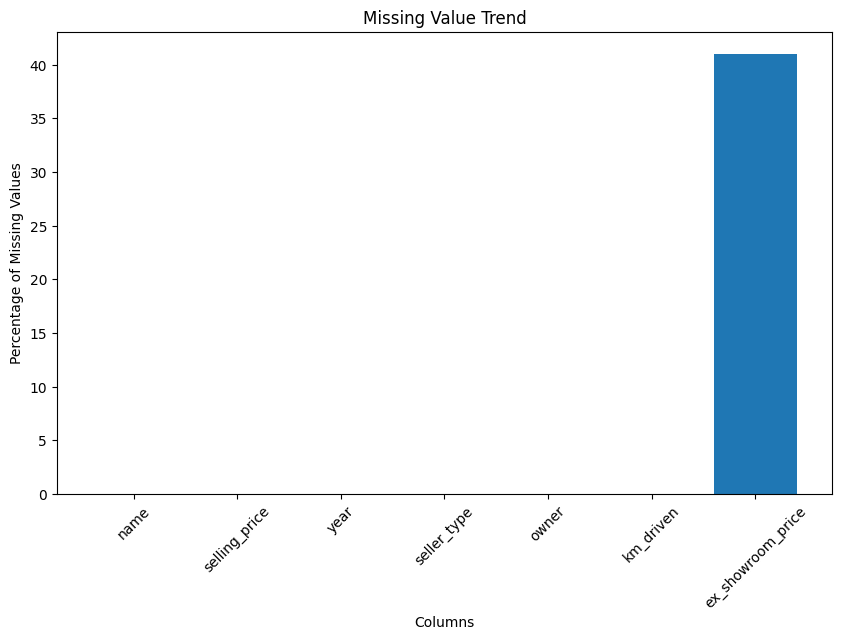

In [ ]:
# 7. Missing value trend
missing_values = df.isnull().sum() / len(df) * 100
print(f"Missing value percentages:\n{missing_values}")
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Trend')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 8. Highest ex_showroom_price and corresponding bike
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]['name'].values[0]
print(f"Highest ex_showroom_price: {highest_ex_showroom_price}")
print(f"Bike with highest ex_showroom_price: {bike_with_highest_price}")

Highest ex_showroom_price: 1278000.0
Bike with highest ex_showroom_price: Harley-Davidson Street Bob


In [ ]:
# 9. Total number of bikes listed by each seller type
bikes_by_seller_type = df['seller_type'].value_counts()
print(f"Total number of bikes listed by each seller type:\n{bikes_by_seller_type}")


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


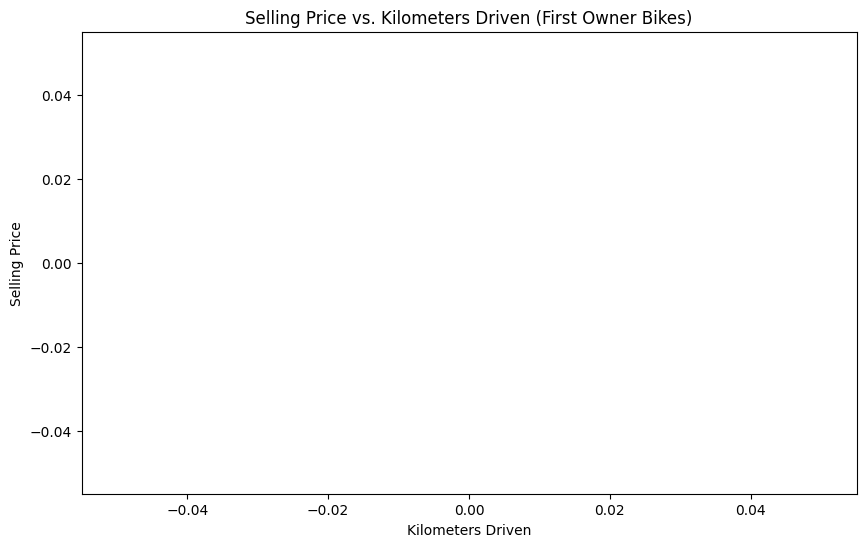

Correlation between selling_price and km_driven for first-owner bikes: nan


In [ ]:
# 10. Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Kilometers Driven (First Owner Bikes)')
plt.show()
correlation = first_owner_bikes['km_driven'].corr(first_owner_bikes['selling_price'])
print(f"Correlation between selling_price and km_driven for first-owner bikes: {correlation}")


In [ ]:
# 11. Identify and remove outliers in km_driven using IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]


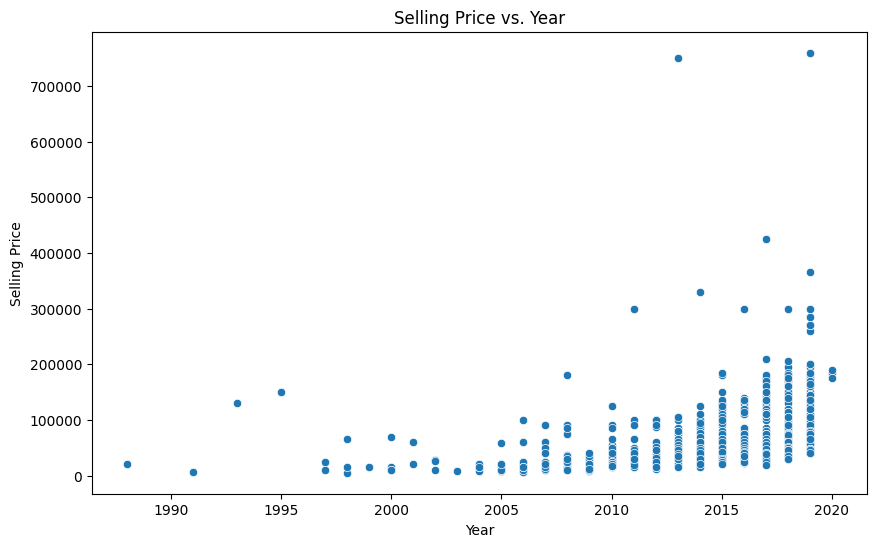

In [ ]:
# 12. Bivariate analysis: year vs. selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Year')
plt.show()


In [ ]:
# 13. Average depreciation based on age
df['age'] = 2023 - df['year']  # Assuming current year is 2023
df['depreciation_percentage'] = ((df['ex_showroom_price'] - df['selling_price']) / df['ex_showroom_price']) * 100
avg_depreciation_by_age = df.groupby('age')['depreciation_percentage'].mean()
print(f"Average depreciation by age:\n{avg_depreciation_by_age}")

Average depreciation by age:
age
3    -21.998202
4      2.691909
5     13.778047
6     23.145691
7     33.556550
8     35.941873
9     39.232589
10    46.811617
11    52.973641
12    58.773457
13    58.148112
14    61.784763
15    72.661454
16    62.080980
17    77.160118
18    81.769124
19    67.184424
20          NaN
21          NaN
22    63.538248
23          NaN
24          NaN
25          NaN
26          NaN
28          NaN
30          NaN
32          NaN
35          NaN
Name: depreciation_percentage, dtype: float64


In [ ]:
# 14. Bikes priced significantly above average for their year
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['above_avg_price'] = df['selling_price'] > df['year'].map(avg_price_by_year)
bikes_above_avg = df[df['above_avg_price']]['name'].unique()
print(f"Bikes priced significantly above average for their year:\n{bikes_above_avg}")


Bikes priced significantly above average for their year:
['Royal Enfield Classic 350' 'Royal Enfield Classic Gunmetal Grey'
 'Yamaha Fazer FI V 2.0 [2016-2018]'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa 42'
 'Hero Honda Glamour' 'Yamaha YZF R15 S' 'Yamaha FZ25' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Yamaha FZ16' 'Royal Enfield Electra 5 S'
 'Hero Honda Passion Plus' 'Royal Enfield Bullet 350'
 'Bajaj Pulsar 150 [2001-2011]' 'Hero Xtreme Sports'
 'Honda CB Hornet 160R' 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Bajaj Pulsar AS200' 'Royal Enfield Thunderbird 350X'
 'Suzuki Intruder 150' 'Hero Honda Karizma ZMR [2010]'
 'Honda CB Unicorn 150' 'Hero Honda CD Deluxe'
 'Royal Enfield Classic Desert Storm' 'TVS Apache RTR 200 4V'
 'UM Renegade Commando' 'Royal Enfield Continental GT 650'
 'Honda Activa 3G' 'Harley-Davidson Street Bob'
 'KTM 390 Duke ABS [2013-2016]' 'KTM 200 Duke' 'Royal Enfield Class

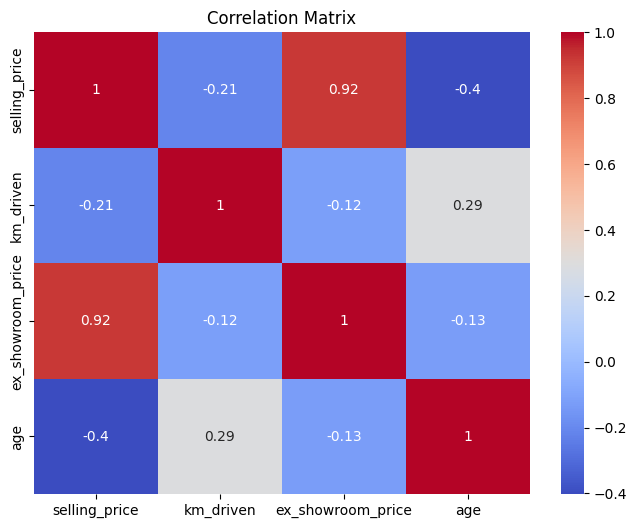

In [ ]:
# 15. Correlation matrix and heatmap
numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price', 'age']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

2)  Car Sale Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('/content/Car Sale.csv')


In [ ]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [ ]:
# 1. Average selling price of cars for each dealer
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean() # Changed 'Price($)' to 'Selling_Price'
print("Average Selling Price by Dealer:\n", avg_price_by_dealer)


Average Selling Price by Dealer:
 Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.8

In [ ]:
# 2. Car brand with highest price variation
price_variation_by_brand = df.groupby('Company')['Price ($)'].std()
brand_highest_variation = price_variation_by_brand.idxmax()
print(f"Car brand with highest price variation: {brand_highest_variation}")
print("This suggests a wide range of models, features, and possibly age within this brand.")


Car brand with highest price variation: Lincoln
This suggests a wide range of models, features, and possibly age within this brand.


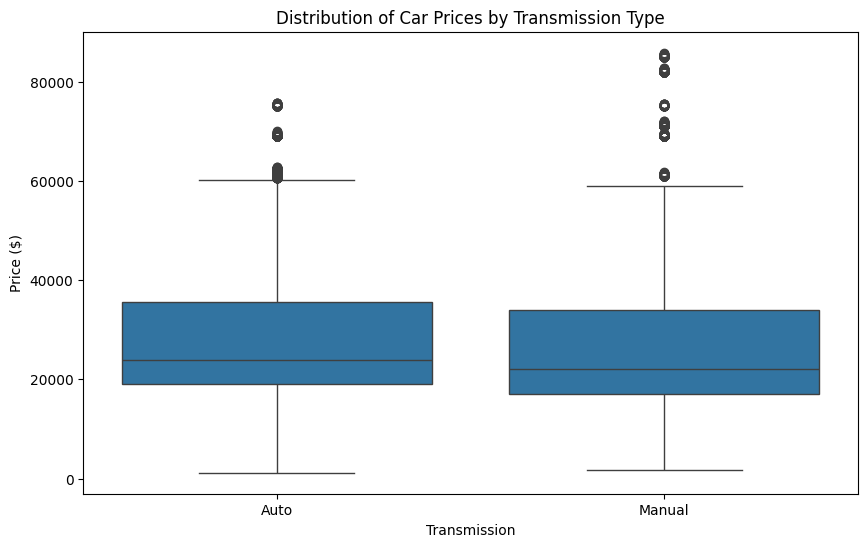

Interquartile Ranges (IQR) can be observed from the boxplot.


In [ ]:
# 3. Distribution of car prices for each transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()
print("Interquartile Ranges (IQR) can be observed from the boxplot.")


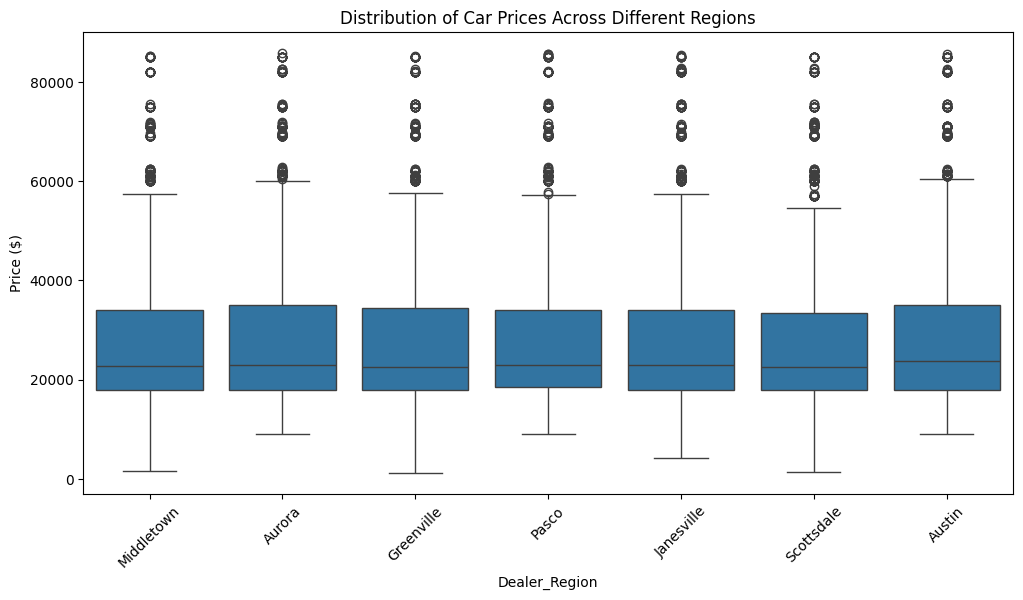

In [ ]:
# 4. Distribution of car prices across different regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)
plt.show()

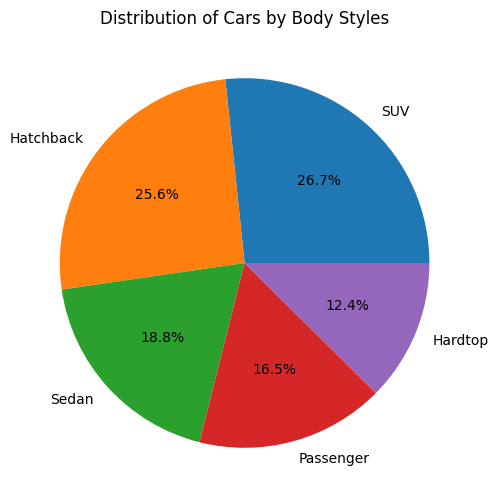

In [ ]:
# 5. Distribution of cars based on body styles
body_style_counts = df['Body Style'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Cars by Body Styles")
plt.show()

In [ ]:
# 6. Average selling price by customer gender and annual income
avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print("Average Selling Price by Customer Gender and Annual Income:\n", avg_price_by_gender_income)


Average Selling Price by Customer Gender and Annual Income:
 Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


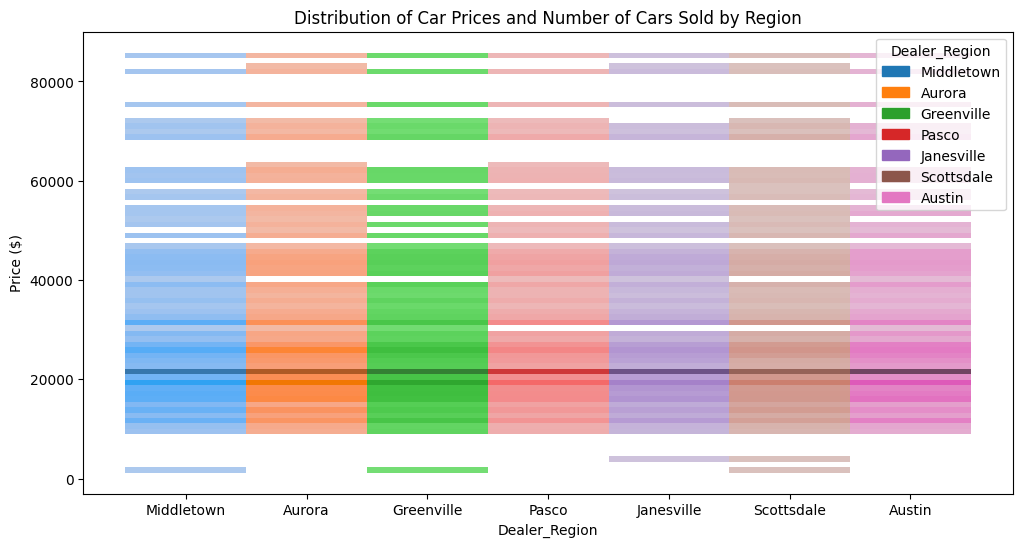

In [ ]:
# 7. Distribution of car prices by region and number of cars sold
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Dealer_Region', y='Price ($)', hue='Dealer_Region', multiple='stack')
plt.title("Distribution of Car Prices and Number of Cars Sold by Region")
plt.show()


In [ ]:
# 8. Average car price by engine size
avg_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()
print("Average Car Price by Engine Size:\n", avg_price_by_engine_size)


Average Car Price by Engine Size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [ ]:
# 9. Car prices by customer's annual income bracket
# Create income brackets (example)
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Very High'])
avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()
print("Average Car Price by Income Bracket:\n", avg_price_by_income_bracket)

Average Car Price by Income Bracket:
 Income_Bracket
Low          27884.297820
Medium       43000.000000
High         23200.200000
Very High    28149.089557
Name: Price ($), dtype: float64


<ipython-input-52-116a0f9310c4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean()


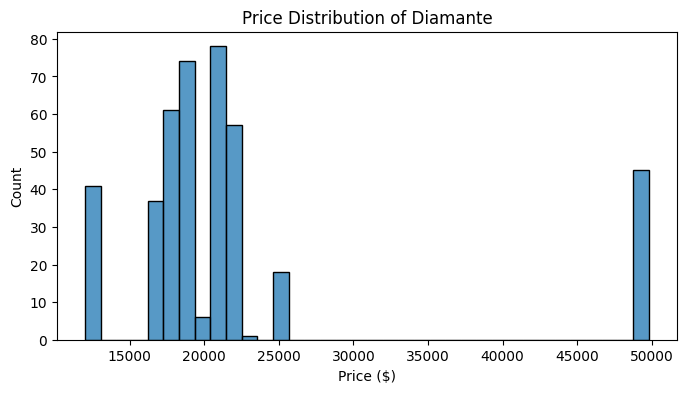

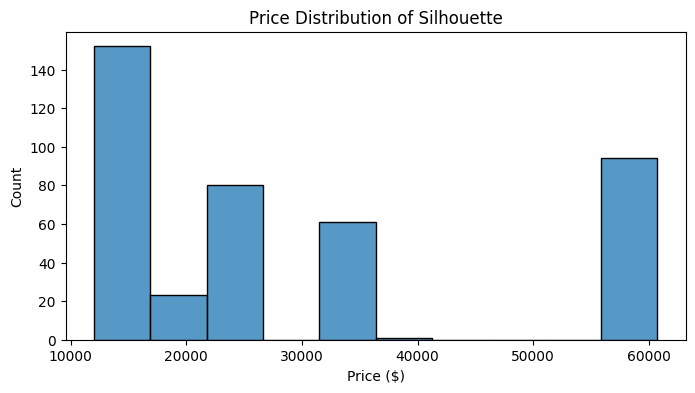

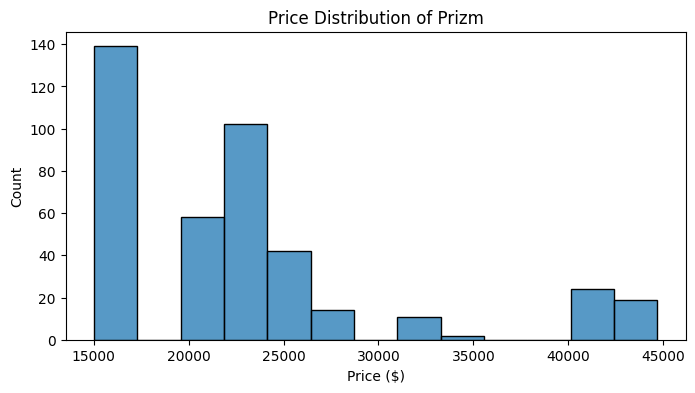

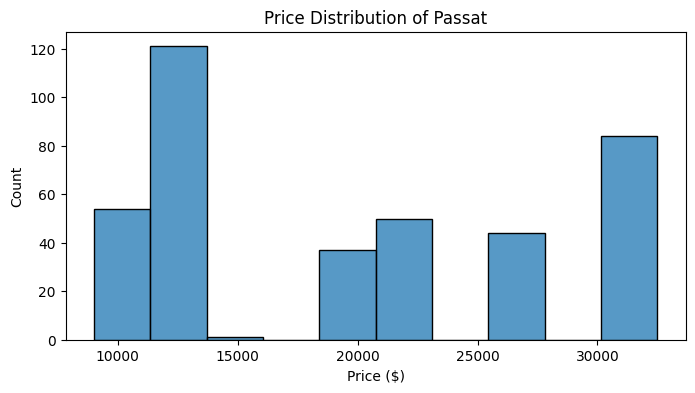

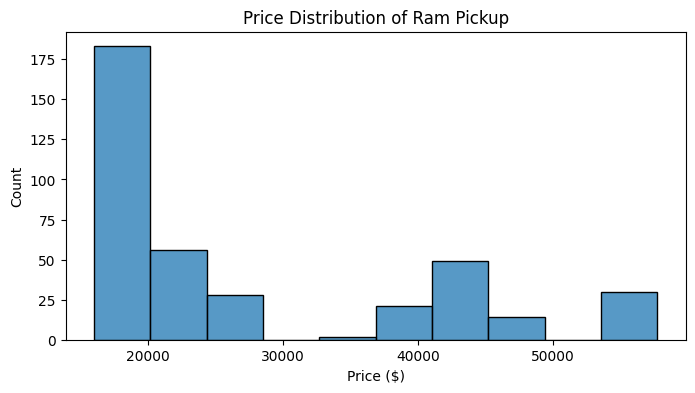

In [ ]:
# 10. Top 5 car models with highest sales and their price distributions
top_5_models = df['Model'].value_counts().head(5).index
for model in top_5_models:
    model_df = df[df['Model'] == model]
    plt.figure(figsize=(8, 4))
    sns.histplot(model_df['Price ($)'])
    plt.title(f"Price Distribution of {model}")
    plt.show()

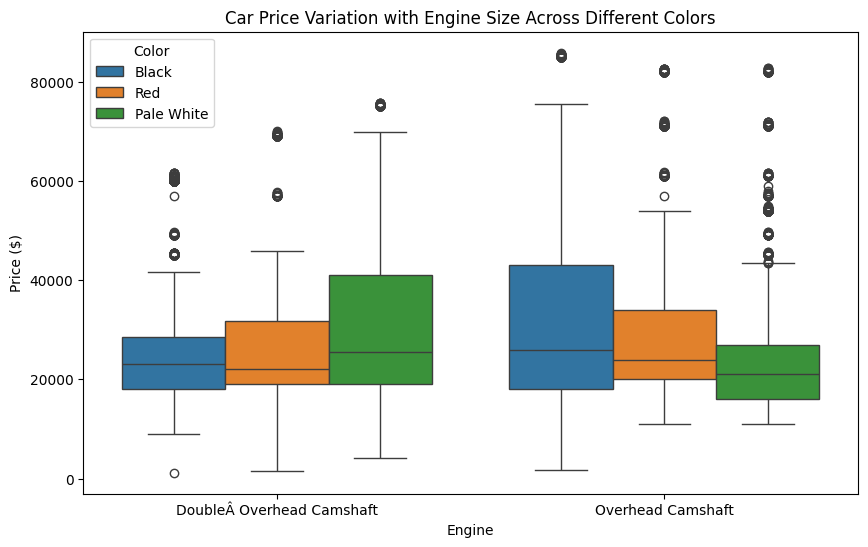

Colors with higher boxplot spread indicate higher price variation.


In [ ]:
# 11. Car price variation with engine size across different car colors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title("Car Price Variation with Engine Size Across Different Colors")
plt.show()
print("Colors with higher boxplot spread indicate higher price variation.")


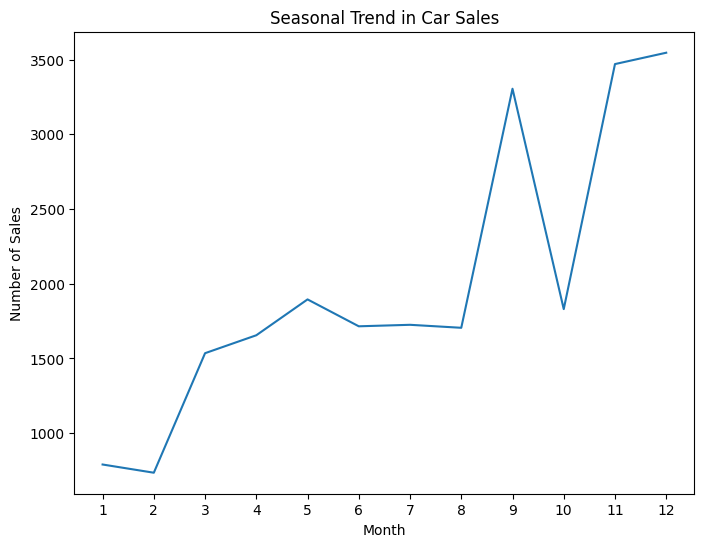

In [ ]:
# 12. Seasonal trend in car sales (assuming 'Date_of_Sale' is in datetime format)
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Price ($)'].count()
plt.figure(figsize=(8, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title("Seasonal Trend in Car Sales")
plt.xticks(range(1, 13))
plt.show()

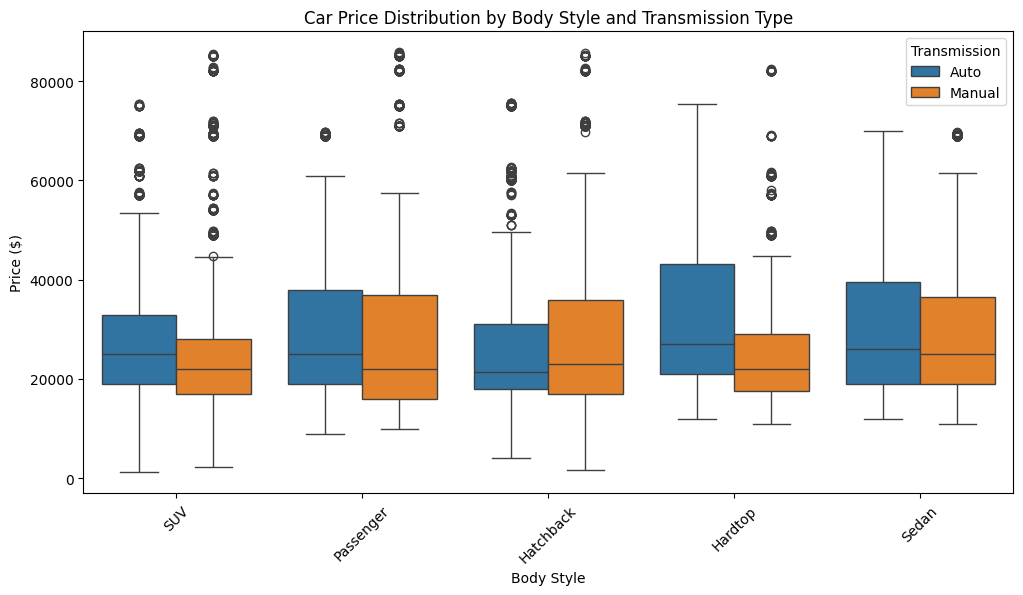

In [ ]:
# 13. Car price distribution by body style and transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.show()


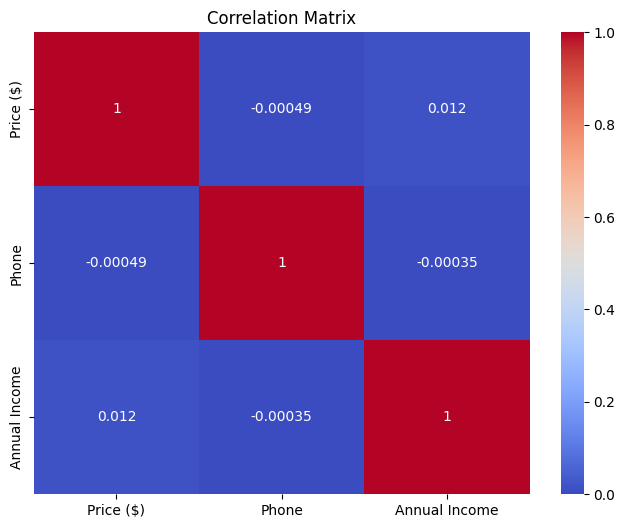

In [ ]:
# 14. Correlation between car price, engine size, and annual income
# Convert 'Engine' column to numeric if it contains string values
# Assuming 'Engine Size' column has numeric engine size data
#correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()  # Changed 'Engine' to 'Engine Size'
correlation_matrix = df[['Price ($)', 'Phone', 'Annual Income']].corr() # Use 'Engine Size' which is likely numeric

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 15. Average car price across different car models and engine types
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print("Average Car Price by Model and Engine Type:\n", avg_price_by_model_engine)

Average Car Price by Model and Engine Type:
 Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


3) Amazon Sales Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load your dataset (replace 'your_data.csv' with your actual file)
df = pd.read_csv('/content/amazon.csv')

In [ ]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
# 1. Average rating for each product category
# Convert 'rating' column to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_by_category = df.groupby('category')['rating'].mean()
print("Average Rating for Each Category:\n", avg_rating_by_category)

Average Rating for Each Category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Pape

In [ ]:
# 2. Top rating_count products by category
# Convert 'rating_count' to numeric, removing commas and handling errors
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
top_rated_products = df.groupby(['category', 'product_name'])['rating_count'].sum().astype(int).groupby('category').nlargest(3)
print("Top 3 Rated Products by Category:\n", top_rated_products)

Top 3 Rated Products by Category:
 category                                                                                                                category                                                                                                                product_name                                                                                                                                                                                               
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                  Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                  Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black                               1118
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapt

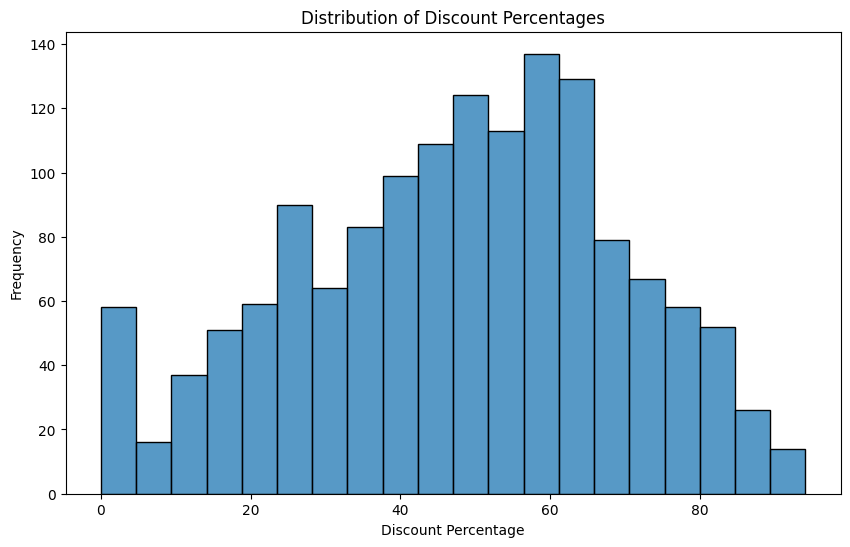

In [ ]:
# 3. Distribution of discounted prices vs. actual prices
# Convert 'actual_price' and 'discounted_price' to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('[^0-9.]', '', regex=True), errors='coerce')

df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=20)
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Discount Percentages")
plt.show()

In [ ]:
# 4. Average discount percentage across categories
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print("Average Discount Percentage by Category:\n", avg_discount_by_category)

Average Discount Percentage by Category:
 category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePape

In [ ]:
# 5. Most popular product names
popular_products = df['product_name'].value_counts().head(10)
print("Most Popular Product Names:\n", popular_products)

Most Popular Product Names:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                

In [ ]:
# 6. Most popular product keywords (assuming 'product_keywords' is a list of keywords)
# Check if 'product_keywords' column exists
if 'product_keywords' in df.columns:
    all_keywords = [keyword for keywords_list in df['product_keywords'].dropna().astype(str).tolist() for keyword in keywords_list.split(',')]
    from collections import Counter
    word_counts = Counter(all_keywords)
    most_common_keywords = word_counts.most_common(10)
    print("Most Popular Product Keywords:\n", most_common_keywords)
else:
    print("Column 'product_keywords' not found in the DataFrame.")

Column 'product_keywords' not found in the DataFrame.


In [ ]:
# 7. Most popular product reviews (assuming you have a column for 'likes' or 'upvotes' on reviews)
if 'likes' in df.columns:
    popular_reviews = df.sort_values(by='likes', ascending=False)['review'].head(5)
elif 'upvotes' in df.columns:
    popular_reviews = df.sort_values(by='upvotes', ascending=False)['review'].head(5)
else:
    print("No 'likes' or 'upvotes' column found. Cannot determine most popular reviews.")
    popular_reviews = None

if popular_reviews is not None:
    print("Most Popular Product Reviews:\n", popular_reviews)

No 'likes' or 'upvotes' column found. Cannot determine most popular reviews.


In [ ]:
# 8. Correlation between discounted_price and rating
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between Discounted Price and Rating: {correlation}")

Correlation between Discounted Price and Rating: 0.12033741712288548


In [ ]:
# 9. Top 5 categories based on the highest ratings
top_5_categories = avg_rating_by_category.nlargest(5)
print("Top 5 Categories Based on Highest Ratings:\n", top_5_categories)

Top 5 Categories Based on Highest Ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [ ]:
# 10. Potential areas for improvement or optimization
print("Potential Areas for Improvement/Optimization:")
print("- **Focus on high-potential categories:** Prioritize marketing and product development efforts on categories with high average ratings and customer satisfaction.")
print("- **Optimize pricing strategies:** Analyze the impact of discounts on sales and profitability. Consider dynamic pricing based on demand, competitor pricing, and inventory levels.")
print("- **Improve product quality:** Focus on improving product quality in categories with lower average ratings to enhance customer satisfaction.")
print("- **Enhance product descriptions:** Use relevant keywords and compelling descriptions to improve product discoverability and attract more customers.")
print("- **Leverage customer feedback:** Analyze customer reviews to identify areas for product improvement and address customer concerns.")
print("- **Personalize recommendations:** Utilize customer purchase history, browsing behavior, and product preferences to provide personalized product recommendations.")

Potential Areas for Improvement/Optimization:
- **Focus on high-potential categories:** Prioritize marketing and product development efforts on categories with high average ratings and customer satisfaction.
- **Optimize pricing strategies:** Analyze the impact of discounts on sales and profitability. Consider dynamic pricing based on demand, competitor pricing, and inventory levels.
- **Improve product quality:** Focus on improving product quality in categories with lower average ratings to enhance customer satisfaction.
- **Enhance product descriptions:** Use relevant keywords and compelling descriptions to improve product discoverability and attract more customers.
- **Leverage customer feedback:** Analyze customer reviews to identify areas for product improvement and address customer concerns.
- **Personalize recommendations:** Utilize customer purchase history, browsing behavior, and product preferences to provide personalized product recommendations.


4) Spotify Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset (replace 'your_data.csv' with your actual file)
df = pd.read_csv('/content/spotify.csv')


In [11]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


In [26]:
# Check for null values
print(df.isnull().sum())

Artist           0
Track Name       0
popularity       0
Duration (ms)    0
Track ID         0
popularity       0
dtype: int64


In [33]:
# Check for duplicate rows
print(df.duplicated().sum())

0


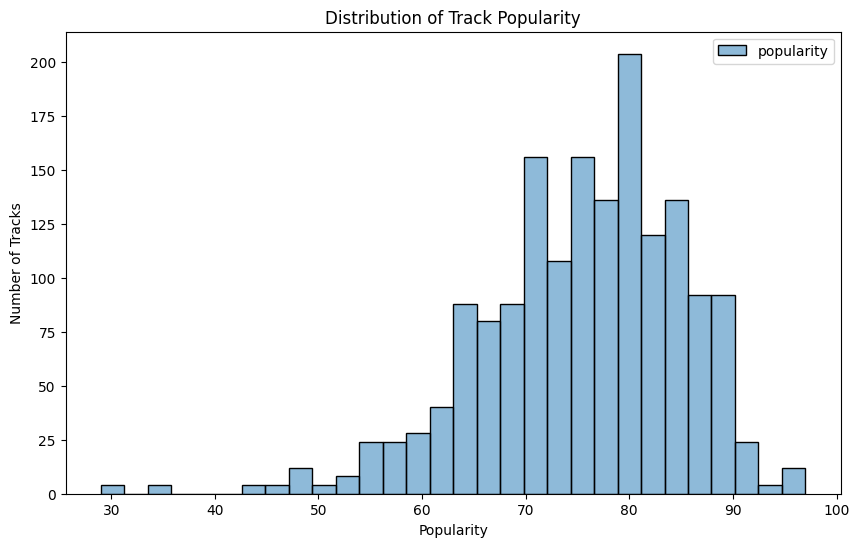

In [34]:
# Distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

In [36]:
# Relationship between popularity and duration
plt.figure(figsize=(10, 6))

# Check if 'duration_ms' column exists before plotting
if 'duration_ms' in df.columns:
    sns.scatterplot(x='duration_ms', y='popularity', data=df)
    plt.title('Popularity vs. Duration')
    plt.xlabel('Duration (ms)')
    plt.ylabel('Popularity')
    plt.show()
else:
    print("Column 'duration_ms' not found in the DataFrame. Check your data.")

Column 'duration_ms' not found in the DataFrame. Check your data.


<Figure size 1000x600 with 0 Axes>

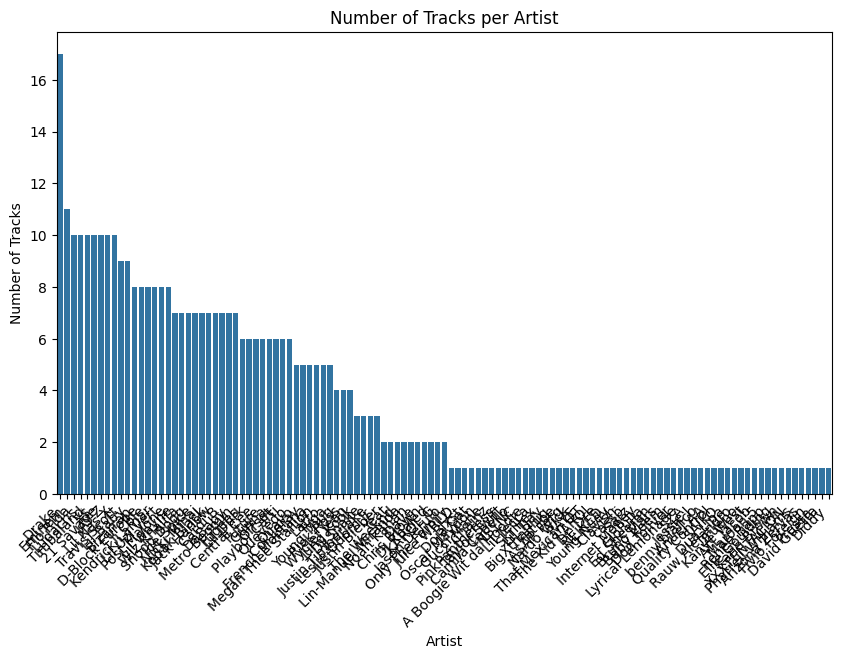

In [38]:
# Artist with the highest number of tracks
plt.figure(figsize=(10, 6))
sns.countplot(x='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45, ha='right')
plt.show()
